# Digit Recognition
This notebook will explore digit recognition using kaggle data. THe goal will be to create a CNN that can predict the digits with above a 98% accuracy.

### Import The Required Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns 
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from __future__ import absolute_import, division, print_function, unicode_literals
from collections import Counter
# Enable eager execution


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
y_train = train['label']
X_train = train.drop('label', axis=1)

### Preview the data

In [11]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
labels = train["label"].value_counts()
labels 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

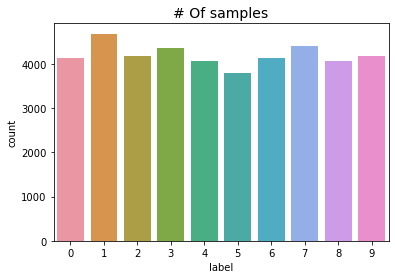

In [4]:
sns.set_palette("Accent")
sns.countplot(x=y_train)
plt.title('# Of samples', size=14)
plt.show()

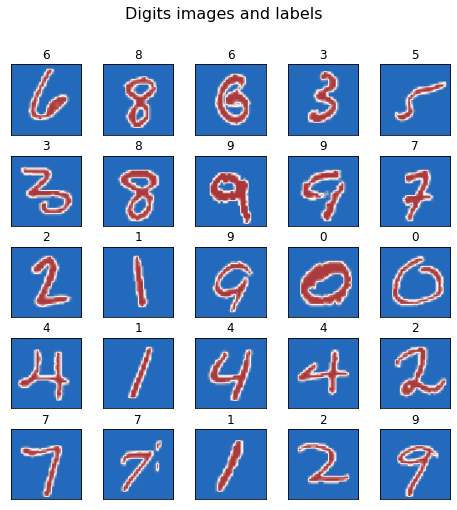

In [5]:
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=16)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, X_train.shape[0])
    ax[i].imshow(np.array(X_train.iloc[sample_n]).reshape(28, 28), cmap='vlag')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(y_train[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)

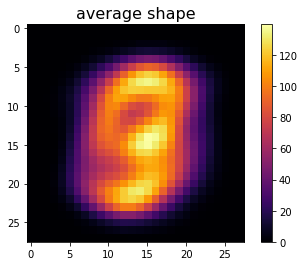

In [6]:
plt.imshow(np.array(X_train.mean()).reshape(28, 28), cmap='inferno')
plt.colorbar()
plt.title('average shape', {'fontsize': 16})
plt.show()

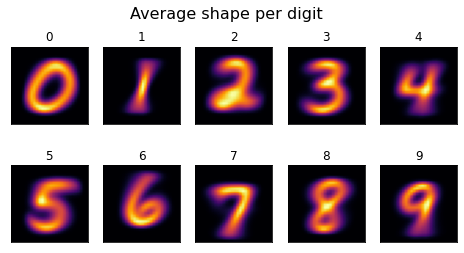

In [7]:
fig, ax = plt.subplots(2, 5, figsize=(8, 4))
fig.suptitle('Average shape per digit', fontsize=16)

ax = ax.ravel()

for i in range(10):
    ax[i].imshow(np.array(train[train['label'] == i].drop('label', axis=1).mean()).reshape(28, 28), cmap='inferno')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(i, fontsize = 12)

In [14]:
X_train_array = np.array(X_train)
X_train_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
test_array = np.array(test)
test_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
X_train_array.shape

(42000, 784)

In [19]:
test_array.shape

(28000, 784)

In [20]:
X_train_array = X_train_array.reshape(42000, 28, 28, 1)
X_train_array.shape

(42000, 28, 28, 1)

In [21]:
test_array = test_array.reshape(-1, 28, 28, 1)
test_array.shape

(28000, 28, 28, 1)

In [22]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode="constant",
    
    horizontal_flip=False,
    vertical_flip=False,
    
    rotation_range=20,
    
    validation_split=0.2
)

In [25]:
datagen.fit(X_train_array)

In [24]:
tf.random.set_seed(2022)

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [28]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history_new = model.fit(datagen.flow(X_train_array, y_train, batch_size=250, subset='training'),
                    epochs=250,
                    validation_data=datagen.flow(X_train_array, y_train,
         batch_size=10, subset='validation'))

Epoch 1/250
135/135 [==============================] - 17s 117ms/step - loss: 1.4649 - accuracy: 0.4822 - val_loss: 0.8205 - val_accuracy: 0.7254
Epoch 2/250
135/135 [==============================] - 16s 118ms/step - loss: 0.6242 - accuracy: 0.7962 - val_loss: 0.4885 - val_accuracy: 0.8421
Epoch 3/250
135/135 [==============================] - 16s 117ms/step - loss: 0.4375 - accuracy: 0.8596 - val_loss: 0.4060 - val_accuracy: 0.8711
Epoch 4/250
135/135 [==============================] - 16s 120ms/step - loss: 0.3350 - accuracy: 0.8957 - val_loss: 0.3321 - val_accuracy: 0.8974
Epoch 5/250
135/135 [==============================] - 16s 117ms/step - loss: 0.2838 - accuracy: 0.9103 - val_loss: 0.2669 - val_accuracy: 0.9150
Epoch 6/250
135/135 [==============================] - 16s 118ms/step - loss: 0.2522 - accuracy: 0.9215 - val_loss: 0.2329 - val_accuracy: 0.9268
Epoch 7/250
135/135 [==============================] - 16s 118ms/step - loss: 0.2304 - accuracy: 0.9270 - val_loss: 0.2110 -

Epoch 57/250
135/135 [==============================] - 16s 117ms/step - loss: 0.0483 - accuracy: 0.9846 - val_loss: 0.0607 - val_accuracy: 0.9820
Epoch 58/250
135/135 [==============================] - 16s 119ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0574 - val_accuracy: 0.9824
Epoch 59/250
135/135 [==============================] - 15s 110ms/step - loss: 0.0500 - accuracy: 0.9839 - val_loss: 0.0560 - val_accuracy: 0.9829
Epoch 60/250
135/135 [==============================] - 15s 111ms/step - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.0606 - val_accuracy: 0.9812
Epoch 61/250
135/135 [==============================] - 16s 116ms/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0573 - val_accuracy: 0.9827
Epoch 62/250
135/135 [==============================] - 16s 117ms/step - loss: 0.0473 - accuracy: 0.9856 - val_loss: 0.0572 - val_accuracy: 0.9832
Epoch 63/250
135/135 [==============================] - 15s 109ms/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 0

135/135 [==============================] - 15s 113ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.0488 - val_accuracy: 0.9868
Epoch 113/250
135/135 [==============================] - 16s 117ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.0458 - val_accuracy: 0.9869
Epoch 114/250
135/135 [==============================] - 16s 118ms/step - loss: 0.0309 - accuracy: 0.9908 - val_loss: 0.0508 - val_accuracy: 0.9864
Epoch 115/250
135/135 [==============================] - 15s 109ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.0424 - val_accuracy: 0.9865
Epoch 116/250
135/135 [==============================] - 16s 115ms/step - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0494 - val_accuracy: 0.9854
Epoch 117/250
135/135 [==============================] - 15s 114ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0528 - val_accuracy: 0.9836
Epoch 118/250
135/135 [==============================] - 15s 110ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0463 -

135/135 [==============================] - 16s 118ms/step - loss: 0.0233 - accuracy: 0.9928 - val_loss: 0.0406 - val_accuracy: 0.9877
Epoch 168/250
135/135 [==============================] - 16s 115ms/step - loss: 0.0232 - accuracy: 0.9930 - val_loss: 0.0421 - val_accuracy: 0.9877
Epoch 169/250
135/135 [==============================] - 16s 116ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0401 - val_accuracy: 0.9885
Epoch 170/250
135/135 [==============================] - 16s 117ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0416 - val_accuracy: 0.9876
Epoch 171/250
135/135 [==============================] - 15s 112ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0432 - val_accuracy: 0.9885
Epoch 172/250
135/135 [==============================] - 16s 117ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0401 - val_accuracy: 0.9887
Epoch 173/250
135/135 [==============================] - 15s 111ms/step - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0408 -

135/135 [==============================] - 15s 114ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0478 - val_accuracy: 0.9864
Epoch 223/250
135/135 [==============================] - 15s 109ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0459 - val_accuracy: 0.9874
Epoch 224/250
135/135 [==============================] - 16s 115ms/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.0434 - val_accuracy: 0.9888
Epoch 225/250
135/135 [==============================] - 15s 113ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0461 - val_accuracy: 0.9880
Epoch 226/250
135/135 [==============================] - 16s 116ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0451 - val_accuracy: 0.9875
Epoch 227/250
135/135 [==============================] - 15s 111ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.0444 - val_accuracy: 0.9876
Epoch 228/250
135/135 [==============================] - 15s 110ms/step - loss: 0.0182 - accuracy: 0.9946 - val_loss: 0.0498 -

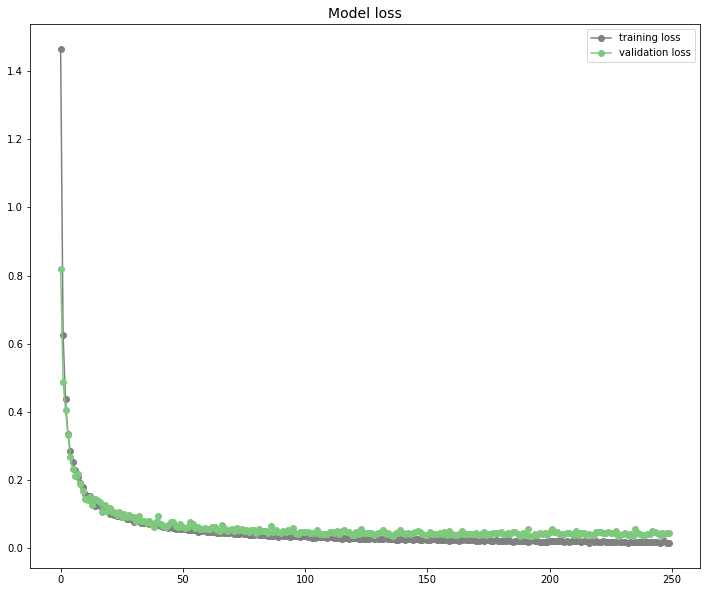

In [31]:
plt.figure(figsize = (12,10))
plt.title('Model loss', fontsize = 14)
plt.plot(range(len(history_new.history['loss'])), history_new.history['loss'], marker='o', c='gray')
plt.plot(range(len(history_new.history['loss'])), history_new.history['val_loss'], marker='o')
plt.legend(labels=['training loss', 'validation loss'])
plt.show()

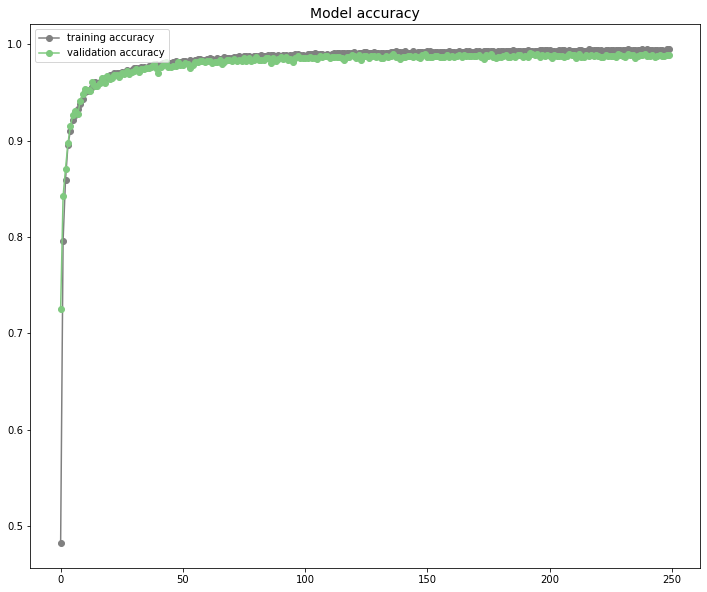

In [32]:
plt.figure(figsize = (12,10))
plt.title('Model accuracy', fontsize = 14)
plt.plot(range(len(history_new.history['loss'])), history_new.history['accuracy'], c='gray', marker='o')
plt.plot(range(len(history_new.history['loss'])), history_new.history['val_accuracy'], marker='o')
plt.legend(labels=['training accuracy', 'validation accuracy'])
plt.show()



## View the Testing data

<ipython-input-33-4cd76179013b>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


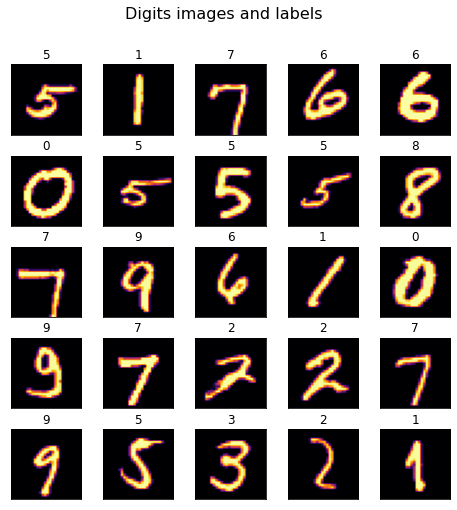

In [33]:
test_array = test_array / 255
test_result = model.predict(test_array)
test_result = np.array(pd.DataFrame(test_result).idxmax(axis=1))
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle('Digits images and labels', fontsize=16)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, test.shape[0])
    ax[i].imshow(np.array(test.iloc[sample_n]).reshape(28, 28), cmap='inferno')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(test_result[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)
fig.show()

In [34]:
ev = model.evaluate(X_train_array, y_train)
ev

1313/1313 [==============================] - 7s 5ms/step - loss: 0.0154 - accuracy: 0.9963


[0.015393698588013649, 0.9962857365608215]

In [35]:
pred = np.array(pd.DataFrame(test_result).idxmax(axis=1))

In [42]:
predicted_data = pd.DataFrame({
    'ImageId': test.index+1,
    'Label': test_result
})


In [43]:
predicted_data.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
